# Creación de datos sintéticos

Para la creación de los conjuntos de datos se han utilizado dos generadores de flujo de la librería _river_: mixed y SEA.

El generador **mixed** produce datos mixtos con cuatro atributos, dos booleanos (True, False) y dos numéricos ([0,1]). El valor de la variable dependiente será determinado por el valor de v, w y z; siendo v y w los atributos booleanos y z el resultado de evaluar los atributos numéricos x e y: $y<0.5 + 0.3*sin(3\pi*x)$

Ofrece las siguientes funciones:
- Función 0: 0 si v y w son True, si v y z son True o si w y z son True. 1 en el resto de los casos.
- Función 1: 1 si v y w son True, si v y z son True o si w y z son True. 0 en el resto de los casos.


El generador **SEA** representa una implementación del Streaming Ensemble Algorithm descrito por W. Nick Street y YongSeog Kim en 2001. El flujo de datos contiene tres atributos numéricos, de los cuales los dos primeros determinarán el valor de la variable dependiente. 

Ofrece las siguientes variantes, siendo v y w los dos primeros atributos:
- Variante 0: 1 si v + w > 8. 0 en el resto de los casos.
- Variante 1: 1 si v + w > 9. 0 en el resto de los casos.
- Variante 2: 1 si v + w > 7. 0 en el resto de los casos.
- Variante 3: 1 si v + w > 9,5. 0 en el resto de los casos.

In [1]:
# Loading libraries
from river.datasets import synth
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

## Generador de flujos *Mixed*

In [2]:
# Generating data streams
data_mixed_0 = synth.Mixed(seed=21, classification_function=0, balance_classes=True)
data_mixed_1 = synth.Mixed(seed=37, classification_function=1, balance_classes=True)

# Generating data stream for gradual drift
data_mixed_0_1_g = synth.ConceptDriftStream(stream=data_mixed_0, drift_stream=data_mixed_1,
                                            seed=107, position=10000, width=500)

In [3]:
# Creating aux dataframes to be used in the creation of datasets

# Abrupt
aux_mixed_0 = pd.DataFrame.from_dict(data_mixed_0.take(10000)) # 0 if two attr. are True
aux_mixed_1 = pd.DataFrame.from_dict(data_mixed_1.take(10000)) # 1 if two attr. are True

mixed_0 = pd.DataFrame(aux_mixed_0[0].values.tolist())
mixed_0["target"] = pd.DataFrame(aux_mixed_0[1].values.tolist())
mixed_0.rename(columns={0:"v", 1:"w",2:"x",3:"y"}, inplace = True)

mixed_1 = pd.DataFrame(aux_mixed_1[0].values.tolist())
mixed_1["target"] = pd.DataFrame(aux_mixed_1[1].values.tolist())
mixed_1.rename(columns={0:"v", 1:"w",2:"x",3:"y"}, inplace = True)

# Gradual
aux_mixed_0_1_g = pd.DataFrame.from_dict(data_mixed_0_1_g.take(20000))

mixed_0_1_g = pd.DataFrame(aux_mixed_0_1_g[0].values.tolist())
mixed_0_1_g["target"] = pd.DataFrame(aux_mixed_0_1_g[1].values.tolist())
mixed_0_1_g.rename(columns={0:"v", 1:"w",2:"x",3:"y"}, inplace = True)

### Conjunto de datos 1 - Drift abrupto

Para la creación de este conjunto se han combinado 20000 entradas, de acuerdo a la siguiente configuración:<br/>

10000 función 0 - 10000 función 1

Con este conjunto se pretende estudiar qué experimento produce una mejor identificación de un drift cuando se produce de manera abrupta.

In [4]:
# Generating dataset from mixed aux dataframes
df_mixed = pd.concat([mixed_0, mixed_1], ignore_index=True)

# Display in screen and export to csv
print(df_mixed.head(10))
df_mixed.to_csv("./_1_data_mixed_abrupto.csv", index=False)

       v      w         x         y  target
0  False   True  0.635000  0.479100       1
1  False   True  0.807854  0.512456       0
2  False  False  0.997561  0.738688       1
3   True   True  0.034070  0.328929       0
4  False  False  0.951964  0.368447       1
5   True   True  0.580766  0.729757       0
6  False  False  0.827018  0.201079       1
7   True   True  0.409602  0.365221       0
8  False  False  0.994843  0.386593       1
9  False   True  0.306614  0.103273       0


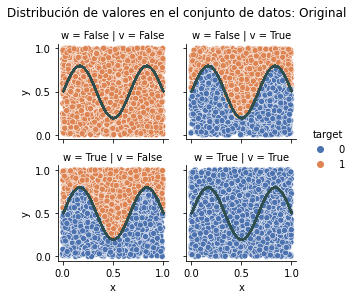

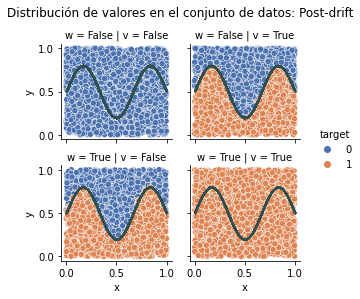

In [5]:
title = ["Original","Post-drift"]
i=0
for df in [df_mixed[:10000],df_mixed[10000:]]:
    x = df["x"].tolist()
    y = df["y"].tolist()
    c = [0.5 + 0.3*math.sin(3*math.pi*x_i) for x_i in x]

    g = sns.relplot(data=df, x='x', y='y', col='v', row='w', hue='target', kind='scatter', palette="deep", height=2)
    axes = g.axes.flatten()
    for ax in axes:
        ax.scatter(x, c, s=0.1, c="darkslategray")
    g.fig.subplots_adjust(top=0.85)
    g.fig.suptitle(f'Distribución de valores en el conjunto de datos: {title[i]}')
    i+=1


### Conjunto de datos 2 - Drift recurrente

Para la creación de este conjunto se han combinado 20000 entradas, de acuerdo a la siguiente configuración:<br/>

5000 función 0 - 5000 función 1 - 5000 función 0 - 5000 función 1

Con este conjunto se pretende estudiar qué experimento produce una mejor identificación de un drift cuando se produce de manera recurrente.

In [6]:
# Generating dataset from mixed aux dataframes
df_mixed = pd.concat([mixed_0[:5000], mixed_1[:5000],mixed_0[5000:], mixed_1[5000:]], ignore_index=True)

# Display in screen and export to csv
print(df_mixed.head(10))
df_mixed.to_csv("./_2_data_mixed_recurrente.csv", index=False)

       v      w         x         y  target
0  False   True  0.635000  0.479100       1
1  False   True  0.807854  0.512456       0
2  False  False  0.997561  0.738688       1
3   True   True  0.034070  0.328929       0
4  False  False  0.951964  0.368447       1
5   True   True  0.580766  0.729757       0
6  False  False  0.827018  0.201079       1
7   True   True  0.409602  0.365221       0
8  False  False  0.994843  0.386593       1
9  False   True  0.306614  0.103273       0


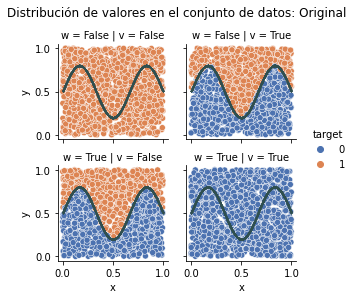

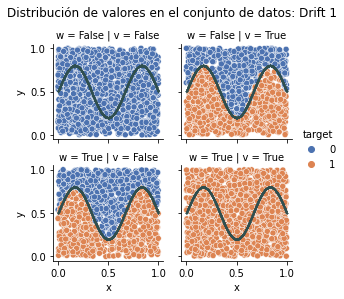

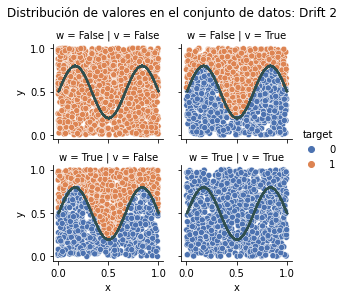

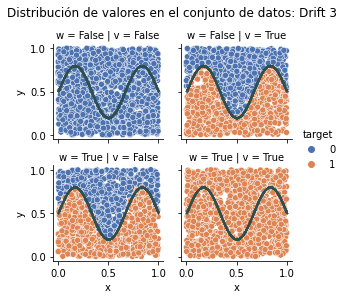

In [7]:
title = "Original"
i = 1
for df in [df_mixed[:5000], df_mixed[5000:10000],df_mixed[10000:15000], df_mixed[15000:]]:
    x = df["x"].tolist()
    y = df["y"].tolist()
    c = [0.5 + 0.3*math.sin(3*math.pi*x_i) for x_i in x]

    g = sns.relplot(data=df, x='x', y='y', col='v', row='w', hue='target', kind='scatter', palette="deep", height=2)
    axes = g.axes.flatten()
    for ax in axes:
        ax.scatter(x, c, s=0.1, c="darkslategray")
    g.fig.subplots_adjust(top=0.85)
    g.fig.suptitle(f'Distribución de valores en el conjunto de datos: {title}')
    title = f"Drift {i}"
    i+=1

### Conjunto de datos 3 - Drift gradual

Para la creación de este conjunto se han combinado 20000 entradas, utilizando la función sigmoidea para producir un drift gradual. <br/>

Composición: función 0 - función 1, con un drift gradual de 500 entradas de duración a partir de la entrada 9750.

Con este conjunto se pretende estudiar qué experimento produce una mejor identificación de un drift cuando se produce de manera gradual.

In [8]:
# Generating dataset from mixed aux dataframes
df_mixed = mixed_0_1_g

# Display in screen and export to csv
print(df_mixed.head(10))
df_mixed.to_csv("./_3_data_mixed_gradual.csv", index=False)

       v      w         x         y  target
0  False   True  0.635000  0.479100       1
1  False   True  0.807854  0.512456       0
2  False  False  0.997561  0.738688       1
3   True   True  0.034070  0.328929       0
4  False  False  0.951964  0.368447       1
5   True   True  0.580766  0.729757       0
6  False  False  0.827018  0.201079       1
7   True   True  0.409602  0.365221       0
8  False  False  0.994843  0.386593       1
9  False   True  0.306614  0.103273       0


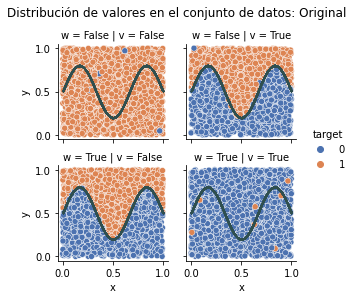

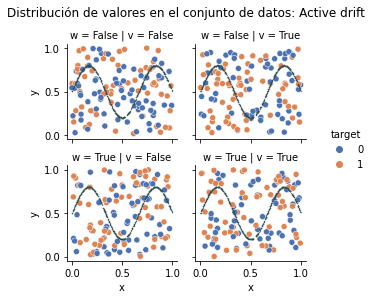

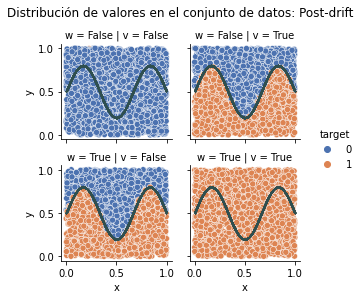

In [9]:
title = ["Original","Active drift", "Post-drift"]
i = 0
for df in [df_mixed[:9750], df_mixed[9750:10250],df_mixed[10250:]]:
    x = df["x"].tolist()
    y = df["y"].tolist()
    c = [0.5 + 0.3*math.sin(3*math.pi*x_i) for x_i in x]

    g = sns.relplot(data=df, x='x', y='y', col='v', row='w', hue='target', kind='scatter', palette="deep", height=2)
    axes = g.axes.flatten()
    for ax in axes:
        ax.scatter(x, c, s=0.1, c="darkslategray")
    g.fig.subplots_adjust(top=0.85)
    g.fig.suptitle(f'Distribución de valores en el conjunto de datos: {title[i]}')
    i+=1

## Generador de flujos *SEA*

In [10]:
# Generating data streams
data_SEA_0 = synth.SEA(seed=21, variant=0) # 1 if sum greater than 8
data_SEA_1 = synth.SEA(seed=37, variant=1) # 1 if sum greater than 9
data_SEA_2 = synth.SEA(seed=37, variant=2) # 1 if sum greater than 7
data_SEA_3 = synth.SEA(seed=37, variant=3) # 1 if sum greater than 9.5

# Generating data stream for gradual drift
data_SEA_1_2_g = synth.ConceptDriftStream(stream=data_SEA_1, drift_stream=data_SEA_2,
                                            seed=107, position=10000, width=500)

In [11]:
# Creating aux dataframes to be used in the creation of datasets
aux_SEA_0 = pd.DataFrame.from_dict(data_SEA_0.take(10000))
aux_SEA_1 = pd.DataFrame.from_dict(data_SEA_1.take(10000))
aux_SEA_2 = pd.DataFrame.from_dict(data_SEA_2.take(10000))
aux_SEA_3 = pd.DataFrame.from_dict(data_SEA_3.take(10000))

SEA_0 = pd.DataFrame(aux_SEA_0[0].values.tolist())
SEA_0["target"] = pd.DataFrame(aux_SEA_0[1].values.tolist())
SEA_0.rename(columns={0:"v", 1:"w",2:"x"}, inplace = True)

SEA_1 = pd.DataFrame(aux_SEA_1[0].values.tolist())
SEA_1["target"] = pd.DataFrame(aux_SEA_1[1].values.tolist())
SEA_1.rename(columns={0:"v", 1:"w",2:"x"}, inplace = True)

SEA_2 = pd.DataFrame(aux_SEA_2[0].values.tolist())
SEA_2["target"] = pd.DataFrame(aux_SEA_2[1].values.tolist())
SEA_2.rename(columns={0:"v", 1:"w",2:"x"}, inplace = True)

SEA_3 = pd.DataFrame(aux_SEA_3[0].values.tolist())
SEA_3["target"] = pd.DataFrame(aux_SEA_3[1].values.tolist())
SEA_3.rename(columns={0:"v", 1:"w",2:"x"}, inplace = True)

# Gradual
aux_SEA_1_2_g = pd.DataFrame.from_dict(data_SEA_1_2_g.take(20000))

SEA_1_2_g = pd.DataFrame(aux_SEA_1_2_g[0].values.tolist())
SEA_1_2_g["target"] = pd.DataFrame(aux_SEA_1_2_g[1].values.tolist())
SEA_1_2_g.rename(columns={0:"v", 1:"w",2:"x",3:"y"}, inplace = True)

### Conjunto de datos 4 - Drift abrupto

Para la creación de este conjunto se han combinado 20000 entradas, de acuerdo a la siguiente configuración:<br/>

10000 variante 1 - 10000 variante 2

Con este conjunto se pretende estudiar qué experimento produce una mejor identificación de un drift cuando se produce de manera abrupta.

In [12]:
# Generating dataset from mixed aux dataframes
df_SEA = pd.concat([SEA_1, SEA_2], ignore_index=True)

# Display in screen and export to csv
print(df_SEA.head(10))
df_SEA.to_csv("./_4_data_SEA_abrupto.csv", index=False)

          v         w         x  target
0  6.820046  0.916026  6.178163   False
1  8.419199  8.345503  5.150177    True
2  6.310380  3.692298  5.280186    True
3  1.078567  6.829499  6.006684   False
4  2.819245  3.785728  7.361315   False
5  4.438774  9.596161  9.712560    True
6  8.383626  0.910275  0.751526    True
7  2.885860  3.611071  7.049529   False
8  8.268865  5.626243  6.391911    True
9  5.730798  0.340566  5.266634   False


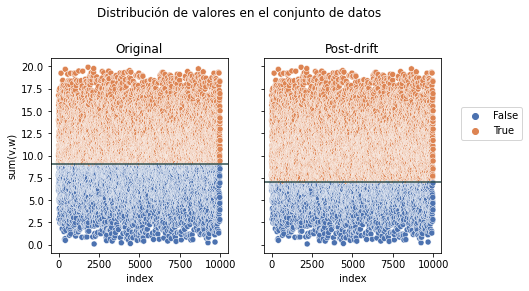

In [13]:
fig, axes = plt.subplots(1,2, figsize=(7,4), sharey=True)
thres = [9,7]
i=0
for df in [df_SEA[:10000],df_SEA[10000:]]:
    g = sns.scatterplot(data=df, x=[i for i in range(len(df))], y=[v + w for v,w in zip(df["v"].tolist(),df["w"].tolist())],
                         hue='target', palette="deep",ax=axes[i])
    axes[i].axhline(y=thres[i], c="darkslategray")
    axes[i].legend([],[], frameon=False)
    axes[i].set_xlabel("index")
    axes[i].set_ylabel("sum(v,w)")
    i+=1

axes[0].title.set_text('Original')
axes[1].title.set_text('Post-drift')

line, label = axes[0].get_legend_handles_labels()
fig.legend(line, label, loc='lower center', bbox_to_anchor=(1, 0.5))
fig.subplots_adjust(top=0.8)
fig.suptitle(f'Distribución de valores en el conjunto de datos')
plt.show()

### Conjunto de datos 5 - Drift recurrente

Para la creación de este conjunto se han combinado 20000 entradas, de acuerdo a la siguiente configuración:<br/>

5000 variante 1 - 5000 variante 2 - 5000 variante 1 - 5000 variante 2

Con este conjunto se pretende estudiar qué experimento produce una mejor identificación de un drift cuando se produce de manera recurrente.

In [14]:
# Generating dataset from mixed aux dataframes
df_SEA = pd.concat([SEA_1[:5000], SEA_2[:5000], SEA_1[5000:], SEA_2[5000:]], ignore_index=True)

# Display in screen and export to csv
print(df_SEA.head(10))
df_SEA.to_csv("./_5_data_SEA_recurrente.csv", index=False)

          v         w         x  target
0  6.820046  0.916026  6.178163   False
1  8.419199  8.345503  5.150177    True
2  6.310380  3.692298  5.280186    True
3  1.078567  6.829499  6.006684   False
4  2.819245  3.785728  7.361315   False
5  4.438774  9.596161  9.712560    True
6  8.383626  0.910275  0.751526    True
7  2.885860  3.611071  7.049529   False
8  8.268865  5.626243  6.391911    True
9  5.730798  0.340566  5.266634   False


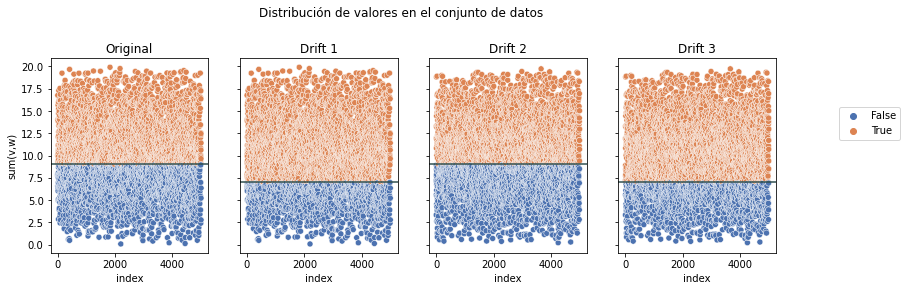

In [15]:
fig, axes = plt.subplots(1,4, figsize=(13, 4), sharey=True)
thres = [9,7,9,7]
i=0
for df in [df_SEA[:5000], df_SEA[5000:10000],df_SEA[10000:15000], df_SEA[15000:]]:
    g = sns.scatterplot(data=df, x=[i for i in range(len(df))], y=[v + w for v,w in zip(df["v"].tolist(),df["w"].tolist())],
                         hue='target', palette="deep",ax=axes[i])
    axes[i].axhline(y=thres[i], c="darkslategray")
    axes[i].legend([],[], frameon=False)
    axes[i].set_xlabel("index")
    axes[i].set_ylabel("sum(v,w)")
    i+=1

axes[0].title.set_text('Original')
axes[1].title.set_text('Drift 1')
axes[2].title.set_text('Drift 2')
axes[3].title.set_text('Drift 3')

line, label = axes[0].get_legend_handles_labels()
fig.legend(line, label, loc='lower center', bbox_to_anchor=(1, 0.5))
fig.subplots_adjust(top=0.8)
fig.suptitle(f'Distribución de valores en el conjunto de datos')
plt.show()

### Conjunto de datos 6 - Drift gradual

Para la creación de este conjunto se han combinado 20000 entradas, utilizando la función sigmoidea para producir un drift gradual. <br/>

Composición: variante 1 - variante 2, con un drift gradual de 500 entradas de duración a partir de la entrada 9750.

Con este conjunto se pretende estudiar qué experimento produce una mejor identificación de un drift cuando se produce de manera gradual.

In [16]:
# Generating dataset from mixed aux dataframes
df_SEA = SEA_1_2_g

# Display in screen and export to csv
print(df_SEA.head(10))
df_SEA.to_csv("./_6_data_SEA_gradual.csv", index=False)

          v         w         x  target
0  6.820046  0.916026  6.178163   False
1  8.419199  8.345503  5.150177    True
2  6.310380  3.692298  5.280186    True
3  1.078567  6.829499  6.006684   False
4  2.819245  3.785728  7.361315   False
5  4.438774  9.596161  9.712560    True
6  8.383626  0.910275  0.751526    True
7  2.885860  3.611071  7.049529   False
8  8.268865  5.626243  6.391911    True
9  5.730798  0.340566  5.266634   False


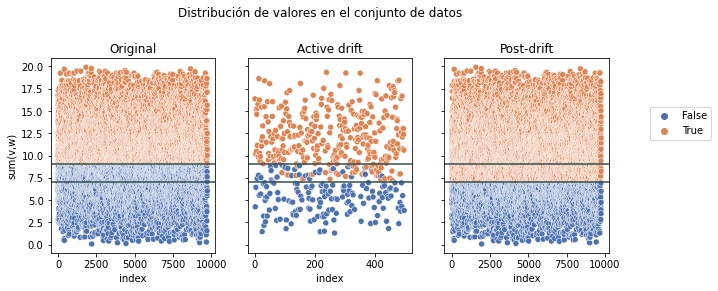

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4), sharey=True)
thres = [9,7]
i=0
for df in [df_SEA[:9750], df_SEA[9750:10250],df_SEA[10250:]]:
    g = sns.scatterplot(data=df, x=[i for i in range(len(df))], y=[v + w for v,w in zip(df["v"].tolist(),df["w"].tolist())],
                         hue='target', palette="deep",ax=axes[i])
    axes[i].axhline(y=thres[0], c="darkslategray")
    axes[i].axhline(y=thres[1], c="darkslategray")
    axes[i].legend([],[], frameon=False)
    axes[i].set_xlabel("index")
    axes[i].set_ylabel("sum(v,w)")
    i+=1

axes[0].title.set_text('Original')
axes[1].title.set_text('Active drift')
axes[2].title.set_text('Post-drift')

line, label = axes[0].get_legend_handles_labels()
fig.legend(line, label, loc='lower center', bbox_to_anchor=(1, 0.5))
fig.subplots_adjust(top=0.8)
fig.suptitle(f'Distribución de valores en el conjunto de datos')
plt.show()

## Generador de flujos *SINE*

In [18]:
# Generating data streams
data_Sine_0 = synth.Sine(classification_function=0, seed=112, balance_classes=True, has_noise=False) # 1 if lower than y=sin(x)
data_Sine_1 = synth.Sine(classification_function=1, seed=112, balance_classes=True, has_noise=False) # 0 if lower than y=sin(x)
data_Sine_2 = synth.Sine(classification_function=2, seed=112, balance_classes=True, has_noise=False) # 1 if lower than y=0.5+0.3*sin(3\pi*x)
data_Sine_3 = synth.Sine(classification_function=3, seed=112, balance_classes=True, has_noise=False) # 0 if lower than y=0.5+0.3*sin(3\pi*x)

# Generating data stream for gradual drift
data_Sine_0_3_g = synth.ConceptDriftStream(stream=data_Sine_0, drift_stream=data_Sine_3,
                                            seed=107, position=10000, width=500)

In [19]:
# Creating aux dataframes to be used in the creation of datasets
aux_Sine_0 = pd.DataFrame.from_dict(data_Sine_0.take(10000))
aux_Sine_1 = pd.DataFrame.from_dict(data_Sine_1.take(10000))
aux_Sine_2 = pd.DataFrame.from_dict(data_Sine_2.take(10000))
aux_Sine_3 = pd.DataFrame.from_dict(data_Sine_3.take(10000))

Sine_0 = pd.DataFrame(aux_Sine_0[0].values.tolist())
Sine_0["target"] = pd.DataFrame(aux_Sine_0[1].values.tolist())
Sine_0.rename(columns={0:"x", 1:"y"}, inplace = True)

Sine_1 = pd.DataFrame(aux_Sine_1[0].values.tolist())
Sine_1["target"] = pd.DataFrame(aux_Sine_1[1].values.tolist())
Sine_1.rename(columns={0:"x", 1:"y"}, inplace = True)

Sine_2 = pd.DataFrame(aux_Sine_2[0].values.tolist())
Sine_2["target"] = pd.DataFrame(aux_Sine_2[1].values.tolist())
Sine_2.rename(columns={0:"x", 1:"y"}, inplace = True)

Sine_3 = pd.DataFrame(aux_Sine_3[0].values.tolist())
Sine_3["target"] = pd.DataFrame(aux_Sine_3[1].values.tolist())
Sine_3.rename(columns={0:"x", 1:"y"}, inplace = True)

# Gradual
aux_Sine_0_3_g = pd.DataFrame.from_dict(data_Sine_0_3_g.take(20000))

Sine_0_3_g = pd.DataFrame(aux_Sine_0_3_g[0].values.tolist())
Sine_0_3_g["target"] = pd.DataFrame(aux_Sine_0_3_g[1].values.tolist())
Sine_0_3_g.rename(columns={0:"x", 1:"y"}, inplace = True)

### Conjunto de datos 7 - Drift abrupto

In [20]:
# Generating dataset from mixed aux dataframes
df_Sine = pd.concat([Sine_0, Sine_3], ignore_index=True)

# Display in screen and export to csv
print(df_Sine.head(10))
df_Sine.to_csv("./_7_data_Sine_abrupto.csv", index=False)

          x         y  target
0  0.481247  0.666088       1
1  0.902263  0.751813       0
2  0.162577  0.220923       1
3  0.454794  0.390128       0
4  0.227373  0.602793       1
5  0.923868  0.167334       0
6  0.065269  0.676498       1
7  0.907327  0.581870       0
8  0.063242  0.245362       1
9  0.662306  0.478315       0


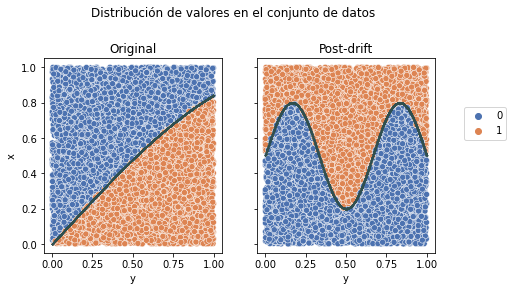

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(7,4), sharey=True)

i=0
for df in [df_Sine[:10000], df_Sine[10000:]]:

    x = df["x"].tolist()
    #y = df["y"].tolist()
    c1 = [math.sin(x_i) for x_i in x]
    c2 = [0.5 + 0.3*math.sin(3*math.pi*x_i) for x_i in x]
    c = [c1,c2]

    g = sns.scatterplot(data=df, x="y", y="x", hue='target', palette="deep", ax=axes[i])
    axes[i].scatter(x, c[i], s=0.1, c="darkslategray")
    axes[i].legend([],[], frameon=False)
    i+=1

axes[0].title.set_text('Original')
axes[1].title.set_text('Post-drift')

line, label = axes[0].get_legend_handles_labels()
fig.legend(line, label, loc='lower center', bbox_to_anchor=(1, 0.5))
fig.subplots_adjust(top=0.8)
fig.suptitle(f'Distribución de valores en el conjunto de datos')
plt.show()


### Conjunto de datos 8 - Drift recurrente

In [22]:
# Generating dataset from mixed aux dataframes
df_Sine = pd.concat([Sine_0[:5000], Sine_3[:5000], Sine_0[5000:], Sine_3[5000:]], ignore_index=True)

# Display in screen and export to csv
print(df_Sine.head(10))
df_Sine.to_csv("./_8_data_Sine_recurrente.csv", index=False)

          x         y  target
0  0.481247  0.666088       1
1  0.902263  0.751813       0
2  0.162577  0.220923       1
3  0.454794  0.390128       0
4  0.227373  0.602793       1
5  0.923868  0.167334       0
6  0.065269  0.676498       1
7  0.907327  0.581870       0
8  0.063242  0.245362       1
9  0.662306  0.478315       0


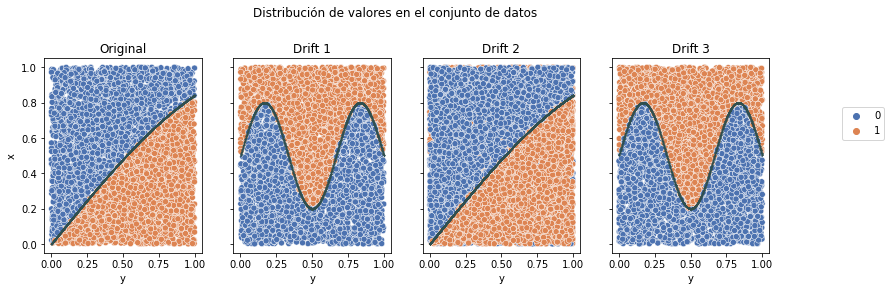

In [23]:
fig, axes = plt.subplots(1, 4, figsize=(13,4), sharey=True)

i=0
for df in [df_Sine[:5000], df_Sine[5000:10000], df_Sine[1000:15000], df_Sine[15000:]]:

    x = df["x"].tolist()
    #y = df["y"].tolist()
    c1 = [math.sin(x_i) for x_i in x]
    c2 = [0.5 + 0.3*math.sin(3*math.pi*x_i) for x_i in x]
    c = [c1,c2,c1,c2]

    g = sns.scatterplot(data=df, x="y", y="x", hue='target', palette="deep", ax=axes[i])
    axes[i].scatter(x, c[i], s=0.1, c="darkslategray")
    axes[i].legend([],[], frameon=False)
    i+=1

axes[0].title.set_text('Original')
axes[1].title.set_text('Drift 1')
axes[2].title.set_text('Drift 2')
axes[3].title.set_text('Drift 3')

line, label = axes[0].get_legend_handles_labels()
fig.legend(line, label, loc='lower center', bbox_to_anchor=(1, 0.5))
fig.subplots_adjust(top=0.8)
fig.suptitle(f'Distribución de valores en el conjunto de datos')
plt.show()

### Conjunto de datos 9 - Drift gradual

In [24]:
# Generating dataset from mixed aux dataframes
df_Sine = Sine_0_3_g

# Display in screen and export to csv
print(df_Sine.head(10))
df_Sine.to_csv("./_9_data_Sine_gradual.csv", index=False)

          x         y  target
0  0.481247  0.666088       1
1  0.902263  0.751813       0
2  0.162577  0.220923       1
3  0.454794  0.390128       0
4  0.227373  0.602793       1
5  0.923868  0.167334       0
6  0.065269  0.676498       1
7  0.907327  0.581870       0
8  0.063242  0.245362       1
9  0.662306  0.478315       0


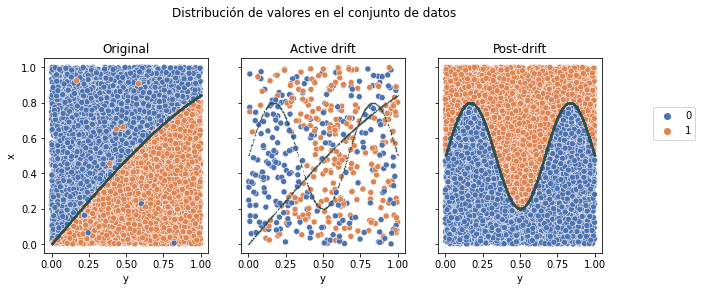

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4), sharey=True)

i=0
for df in [df_Sine[:9750], df_Sine[9750:10250], df_Sine[10250:]]:

    x = df["x"].tolist()
    #y = df["y"].tolist()
    c1 = [math.sin(x_i) for x_i in x]
    c2 = [0.5 + 0.3*math.sin(3*math.pi*x_i) for x_i in x]

    g = sns.scatterplot(data=df, x="y", y="x", hue='target', palette="deep", ax=axes[i])
    if i==0 or i==1:
        axes[i].scatter(x, c1, s=0.1, c="darkslategray")
    if i==1 or i==2:
        axes[i].scatter(x, c2, s=0.1, c="darkslategray")
    axes[i].legend([],[], frameon=False)
    i+=1

axes[0].title.set_text('Original')
axes[1].title.set_text('Active drift')
axes[2].title.set_text('Post-drift')

line, label = axes[0].get_legend_handles_labels()
fig.legend(line, label, loc='lower center', bbox_to_anchor=(1, 0.5))
fig.subplots_adjust(top=0.8)
fig.suptitle(f'Distribución de valores en el conjunto de datos')
plt.show()

## Generador de flujos *STAGGER*

In [26]:
# Generating data streams
data_Stagger_0 = synth.STAGGER(classification_function=0, seed=53, balance_classes=True) # True if small, red
data_Stagger_1 = synth.STAGGER(classification_function=1, seed=53, balance_classes=True) # True if green, circle
data_Stagger_2 = synth.STAGGER(classification_function=2, seed=53, balance_classes=True) # True if medium or large

# Generating data stream for gradual drift
data_Stagger_0_1_g = synth.ConceptDriftStream(stream=data_Stagger_0, drift_stream=data_Stagger_1,
                                            seed=107, position=10000, width=500)

In [27]:
# Creating aux dataframes to be used in the creation of datasets
aux_Stagger_0 = pd.DataFrame.from_dict(data_Stagger_0.take(10000))
aux_Stagger_1 = pd.DataFrame.from_dict(data_Stagger_1.take(10000))
aux_Stagger_2 = pd.DataFrame.from_dict(data_Stagger_2.take(10000))

Stagger_0 = pd.DataFrame(aux_Stagger_0[0].values.tolist())
Stagger_0["target"] = pd.DataFrame(aux_Stagger_0[1].values.tolist())

Stagger_1 = pd.DataFrame(aux_Stagger_1[0].values.tolist())
Stagger_1["target"] = pd.DataFrame(aux_Stagger_1[1].values.tolist())

Stagger_2 = pd.DataFrame(aux_Stagger_2[0].values.tolist())
Stagger_2["target"] = pd.DataFrame(aux_Stagger_2[1].values.tolist())


# Gradual
aux_Stagger_0_1_g = pd.DataFrame.from_dict(data_Stagger_0_1_g.take(20000))

Stagger_0_1_g = pd.DataFrame(aux_Stagger_0_1_g[0].values.tolist())
Stagger_0_1_g["target"] = pd.DataFrame(aux_Stagger_0_1_g[1].values.tolist())

### Conjunto de datos 10 - Drift abrupto

In [28]:
# Generating dataset from stagger aux dataframes
df_Stagger = pd.concat([Stagger_0, Stagger_1], ignore_index=True)

# Display in screen and export to csv
print(df_Stagger.head(10))
df_Stagger.to_csv("./_10_data_Stagger_abrupto.csv", index=False)

   size  color  shape  target
0     0      0      0       1
1     1      2      0       0
2     0      0      1       1
3     0      1      0       0
4     0      0      0       1
5     1      2      2       0
6     0      0      0       1
7     0      2      0       0
8     0      0      1       1
9     1      0      0       0


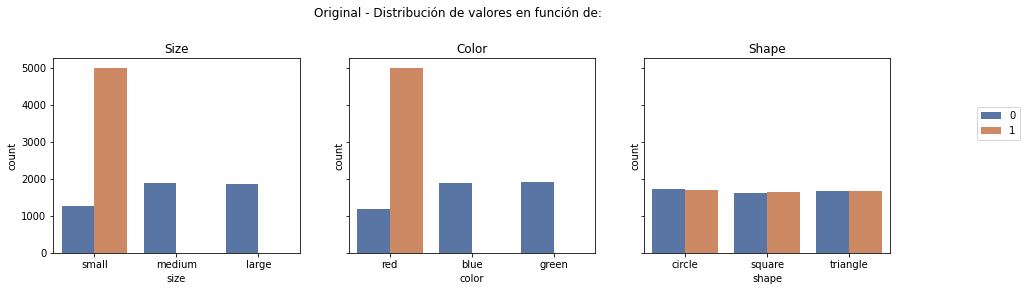

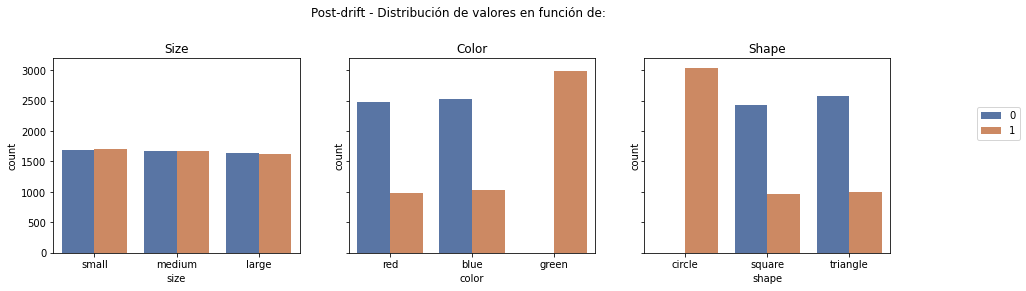

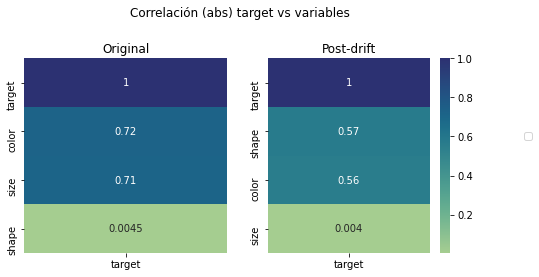

In [29]:
i=0
title = ["Original","Post-drift"]

for df in [df_Stagger[:10000], df_Stagger[10000:]]:

    fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

    sns.countplot(data=df, x="size", hue="target", palette="deep", ax=axes[0])
    axes[0].legend([],[], frameon=False)
    axes[0].set_xticks([0, 1, 2])
    axes[0].set_xticklabels(["small", "medium", "large"])
    sns.countplot(data=df, x="color", hue="target", palette="deep", ax=axes[1])
    axes[1].legend([],[], frameon=False)
    axes[1].set_xticks([0, 1, 2])
    axes[1].set_xticklabels(["red", "blue", "green"])
    sns.countplot(data=df, x="shape", hue="target", palette="deep", ax=axes[2])
    axes[2].legend([],[], frameon=False)
    axes[2].set_xticks([0, 1, 2])
    axes[2].set_xticklabels(["circle", "square", "triangle"])

    axes[0].title.set_text('Size')
    axes[1].title.set_text('Color')
    axes[2].title.set_text('Shape')

    line, label = axes[0].get_legend_handles_labels()
    fig.legend(line, label, loc='lower center', bbox_to_anchor=(1, 0.5))
    fig.subplots_adjust(top=0.8)
    fig.suptitle(f'{title[i]} - Distribución de valores en función de:')
    plt.show()

    i+=1

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
i=0
cbar=False
for df in [df_Stagger[:10000], df_Stagger[10000:]]:

    corr = df.corr()
    sns.heatmap(abs(corr[["target"]]).sort_values(by="target",ascending=False), cbar=cbar, annot=True, cmap="crest", ax=axes[i])
    axes[i].legend([],[], frameon=False)
    axes[i].title.set_text(f'{title[i]}')

    i+=1
    cbar=True

line, label = axes[0].get_legend_handles_labels()
fig.legend(line, label, loc='lower center', bbox_to_anchor=(1, 0.5))
fig.subplots_adjust(top=0.8)
fig.suptitle(f'Correlación (abs) target vs variables')
plt.show()

### Conjunto de datos 11 - Drift recurrente

In [30]:
# Generating dataset from mixed aux dataframes
df_Stagger = pd.concat([Stagger_0[:5000], Stagger_1[:5000], Stagger_0[5000:], Stagger_1[5000:]], ignore_index=True)

# Display in screen and export to csv
print(df_Stagger.head(10))
df_Stagger.to_csv("./_11_data_Stagger_recurrente.csv", index=False)

   size  color  shape  target
0     0      0      0       1
1     1      2      0       0
2     0      0      1       1
3     0      1      0       0
4     0      0      0       1
5     1      2      2       0
6     0      0      0       1
7     0      2      0       0
8     0      0      1       1
9     1      0      0       0


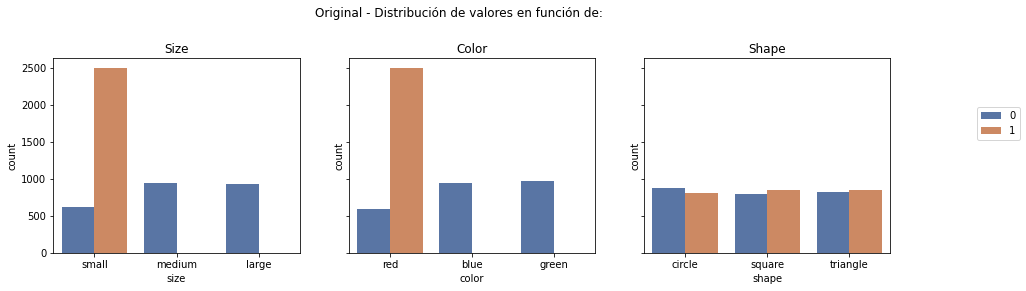

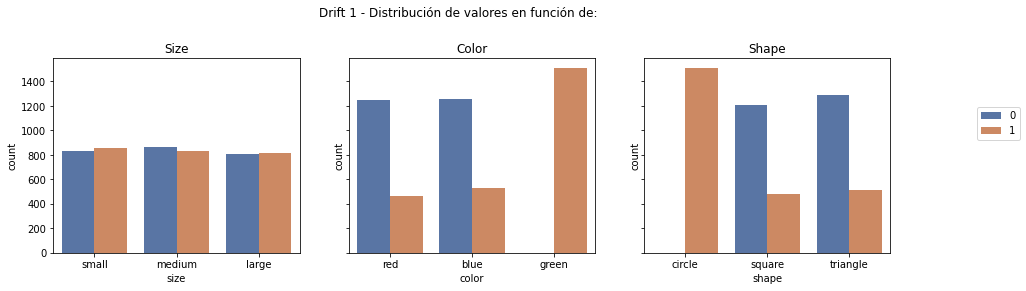

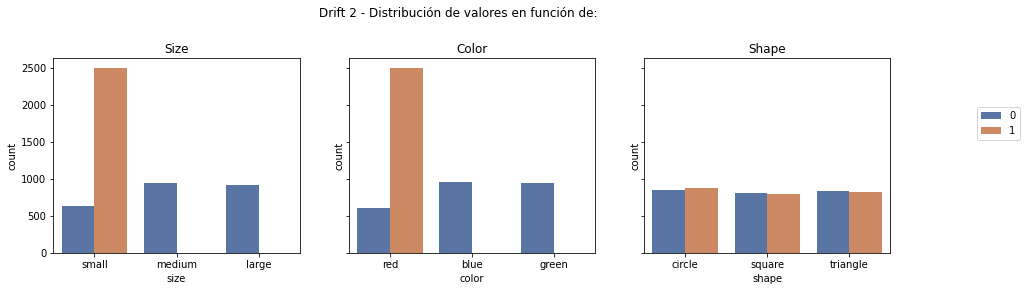

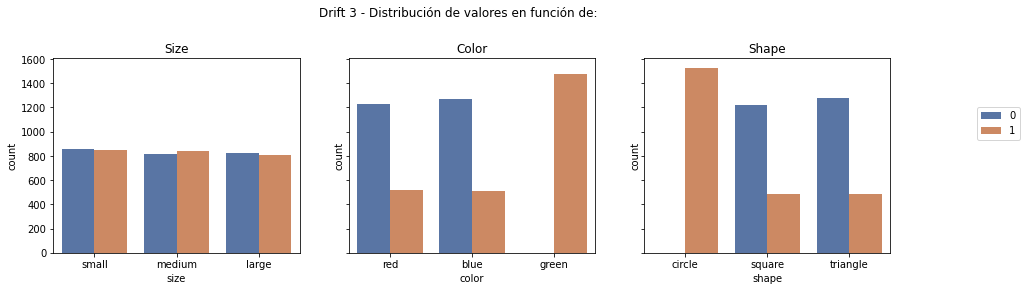

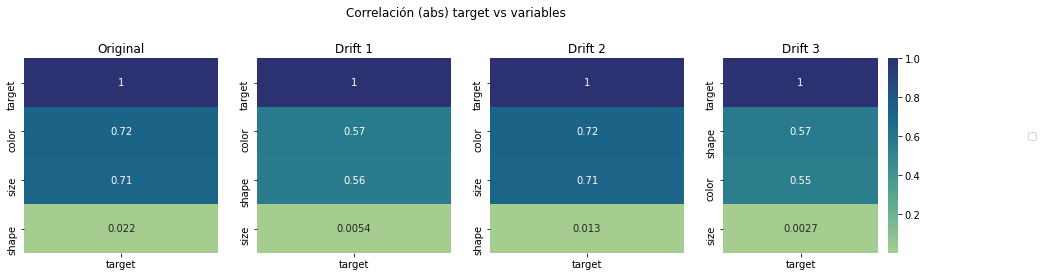

In [31]:
i=0
title = ["Original","Drift 1", "Drift 2", "Drift 3"]

for df in [df_Stagger[:5000], df_Stagger[5000:10000], df_Stagger[10000:15000], df_Stagger[15000:]]:

    fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

    sns.countplot(data=df, x="size", hue="target", palette="deep", ax=axes[0])
    axes[0].legend([],[], frameon=False)
    axes[0].set_xticks([0, 1, 2])
    axes[0].set_xticklabels(["small", "medium", "large"])
    sns.countplot(data=df, x="color", hue="target", palette="deep", ax=axes[1])
    axes[1].legend([],[], frameon=False)
    axes[1].set_xticks([0, 1, 2])
    axes[1].set_xticklabels(["red", "blue", "green"])
    sns.countplot(data=df, x="shape", hue="target", palette="deep", ax=axes[2])
    axes[2].legend([],[], frameon=False)
    axes[2].set_xticks([0, 1, 2])
    axes[2].set_xticklabels(["circle", "square", "triangle"])

    axes[0].title.set_text('Size')
    axes[1].title.set_text('Color')
    axes[2].title.set_text('Shape')

    line, label = axes[0].get_legend_handles_labels()
    fig.legend(line, label, loc='lower center', bbox_to_anchor=(1, 0.5))
    fig.subplots_adjust(top=0.8)
    fig.suptitle(f'{title[i]} - Distribución de valores en función de:')
    plt.show()

    i+=1

fig, axes = plt.subplots(1, 4, figsize=(16, 4))
i=0
cbar=False
for df in [df_Stagger[:5000], df_Stagger[5000:10000], df_Stagger[10000:15000], df_Stagger[15000:]]:

    corr = df.corr()
    sns.heatmap(abs(corr[["target"]]).sort_values(by="target",ascending=False), cbar=cbar, annot=True, cmap="crest", ax=axes[i])
    axes[i].legend([],[], frameon=False)
    axes[i].title.set_text(f'{title[i]}')

    i+=1
    if i==3:
        cbar=True

line, label = axes[0].get_legend_handles_labels()
fig.legend(line, label, loc='lower center', bbox_to_anchor=(1, 0.5))
fig.subplots_adjust(top=0.8)
fig.suptitle(f'Correlación (abs) target vs variables')
plt.show()

### Conjunto de datos 12 - Drift gradual

In [32]:
# Generating dataset from mixed aux dataframes
df_Stagger = Stagger_0_1_g

# Display in screen and export to csv
print(df_Stagger.head(10))
df_Stagger.to_csv("./_12_data_Stagger_gradual.csv", index=False)

   size  color  shape  target
0     0      0      0       1
1     1      2      0       0
2     0      0      1       1
3     0      1      0       0
4     0      0      0       1
5     1      2      2       0
6     0      0      0       1
7     0      2      0       0
8     0      0      1       1
9     1      0      0       0


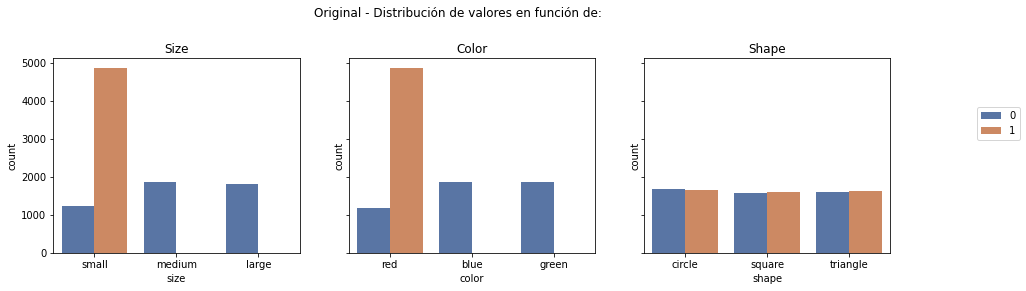

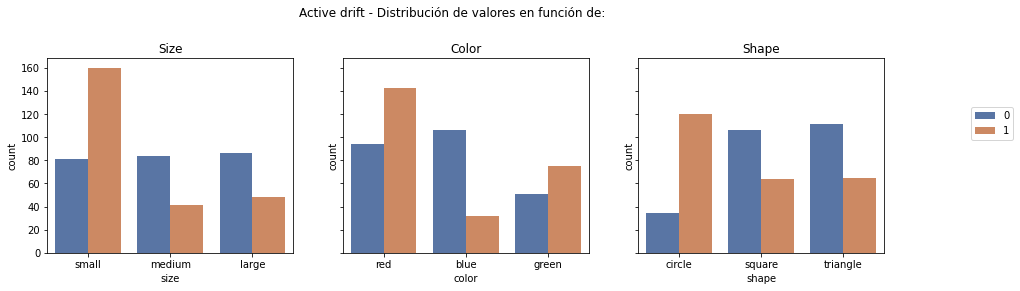

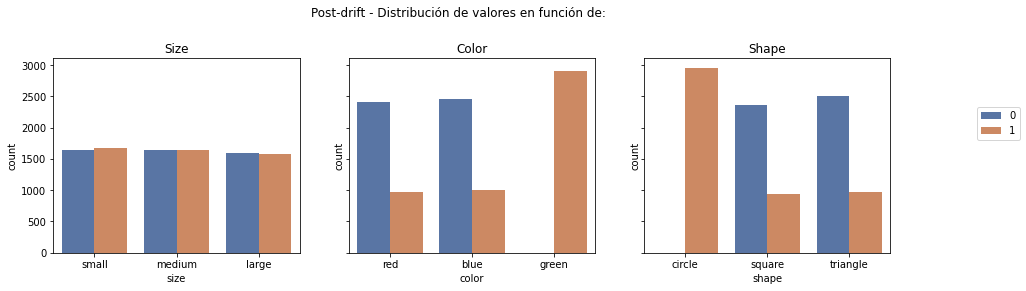

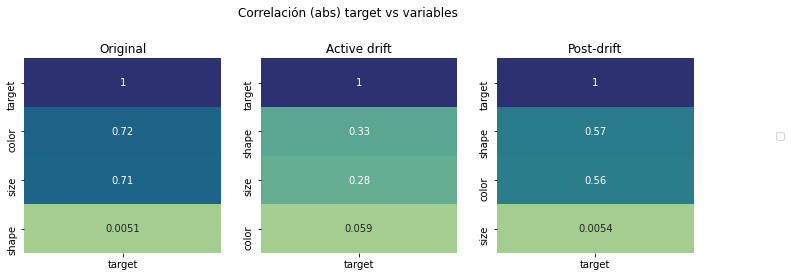

In [33]:
i=0
title = ["Original","Active drift", "Post-drift"]

for df in [df_Stagger[:9750], df_Stagger[9750:10250], df_Stagger[10250:]]:

    fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

    sns.countplot(data=df, x="size", hue="target", palette="deep", ax=axes[0])
    axes[0].legend([],[], frameon=False)
    axes[0].set_xticks([0, 1, 2])
    axes[0].set_xticklabels(["small", "medium", "large"])
    sns.countplot(data=df, x="color", hue="target", palette="deep", ax=axes[1])
    axes[1].legend([],[], frameon=False)
    axes[1].set_xticks([0, 1, 2])
    axes[1].set_xticklabels(["red", "blue", "green"])
    sns.countplot(data=df, x="shape", hue="target", palette="deep", ax=axes[2])
    axes[2].legend([],[], frameon=False)
    axes[2].set_xticks([0, 1, 2])
    axes[2].set_xticklabels(["circle", "square", "triangle"])

    axes[0].title.set_text('Size')
    axes[1].title.set_text('Color')
    axes[2].title.set_text('Shape')

    line, label = axes[0].get_legend_handles_labels()
    fig.legend(line, label, loc='lower center', bbox_to_anchor=(1, 0.5))
    fig.subplots_adjust(top=0.8)
    fig.suptitle(f'{title[i]} - Distribución de valores en función de:')
    plt.show()

    i+=1

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
i=0
cbar=False
for df in [df_Stagger[:9750], df_Stagger[9750:10250], df_Stagger[10250:]]:

    corr = df.corr()
    sns.heatmap(abs(corr[["target"]]).sort_values(by="target",ascending=False), cbar=cbar, annot=True, cmap="crest", ax=axes[i])
    axes[i].legend([],[], frameon=False)
    axes[i].title.set_text(f'{title[i]}')

    i+=1
    if i==3:
        cbar=True

line, label = axes[0].get_legend_handles_labels()
fig.legend(line, label, loc='lower center', bbox_to_anchor=(1, 0.5))
fig.subplots_adjust(top=0.8)
fig.suptitle(f'Correlación (abs) target vs variables')
plt.show()

## Generador de flujos *RANDOM TREE*

In [34]:
# Generating data streams
data_RT_1 = dataset = synth.RandomTree(seed_tree=32, seed_sample=5, n_classes=2, n_num_features=4,
                                            n_cat_features=1, n_categories_per_feature=3, max_tree_depth=7,
                                            first_leaf_level=3, fraction_leaves_per_level=0.2)

data_RT_2 = dataset = synth.RandomTree(seed_tree=257, seed_sample=9, n_classes=2, n_num_features=4,
                                            n_cat_features=1, n_categories_per_feature=3, max_tree_depth=7,
                                            first_leaf_level=3, fraction_leaves_per_level=0.2)

# Generating data stream for gradual drift
data_RT_1_2_g = synth.ConceptDriftStream(stream=data_RT_1, drift_stream=data_RT_2,
                                            seed=107, position=10000, width=500)

In [35]:
# Creating aux dataframes to be used in the creation of datasets
aux_RT_1 = pd.DataFrame.from_dict(data_RT_1.take(10000))
aux_RT_2 = pd.DataFrame.from_dict(data_RT_2.take(10000))

RT_1 = pd.DataFrame(aux_RT_1[0].values.tolist())
RT_1["target"] = pd.DataFrame(aux_RT_1[1].values.tolist())

RT_2 = pd.DataFrame(aux_RT_2[0].values.tolist())
RT_2["target"] = pd.DataFrame(aux_RT_2[1].values.tolist())

# Gradual
aux_RT_1_2_g = pd.DataFrame.from_dict(data_RT_1_2_g.take(20000))

RT_1_2_g = pd.DataFrame(aux_RT_1_2_g[0].values.tolist())
RT_1_2_g["target"] = pd.DataFrame(aux_RT_1_2_g[1].values.tolist())

### Conjunto de datos 13 - Drift abrupto

In [36]:
# Generating dataset from stagger aux dataframes
df_RT = pd.concat([RT_1, RT_2], ignore_index=True)

# Display in screen and export to csv
print(df_RT.head(10))
df_RT.to_csv("./_13_data_RT_abrupto.csv", index=False)

    x_num_0   x_num_1   x_num_2   x_num_3  x_cat_0  target
0  0.622902  0.741787  0.795194  0.942450        2       1
1  0.652032  0.530040  0.840348  0.775959        0       0
2  0.648975  0.900900  0.113206  0.469069        0       0
3  0.380758  0.101974  0.249331  0.731184        1       0
4  0.279482  0.916345  0.765725  0.159604        0       0
5  0.138767  0.617453  0.126699  0.001775        0       0
6  0.209456  0.215481  0.982421  0.872408        1       0
7  0.313651  0.198889  0.876119  0.625730        0       0
8  0.940976  0.690642  0.966564  0.893742        1       0
9  0.021570  0.414907  0.935793  0.263812        1       0


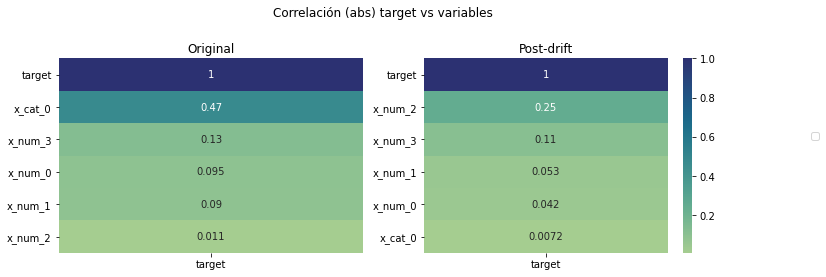

In [40]:
title = ["Original","Post-drift"]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
i=0
cbar=False
for df in [df_RT[:10000], df_RT[10000:]]:

    corr = df.corr()
    sns.heatmap(abs(corr[["target"]]).sort_values(by="target",ascending=False), cbar=cbar, annot=True, cmap="crest", ax=axes[i])
    axes[i].legend([],[], frameon=False)
    axes[i].title.set_text(f'{title[i]}')

    i+=1
    cbar=True

line, label = axes[0].get_legend_handles_labels()
fig.legend(line, label, loc='lower center', bbox_to_anchor=(1, 0.5))
fig.subplots_adjust(top=0.8)
fig.suptitle(f'Correlación (abs) target vs variables')
plt.show()

### Conjunto de datos 14 - Drift recurrente

In [44]:
# Generating dataset from mixed aux dataframes
df_RT = pd.concat([RT_1[:5000], RT_2[:5000], RT_1[5000:], RT_2[5000:]], ignore_index=True)

# Display in screen and export to csv
print(df_RT.head(10))
df_RT.to_csv("./_14_data_RT_recurrente.csv", index=False)

    x_num_0   x_num_1   x_num_2   x_num_3  x_cat_0  target
0  0.622902  0.741787  0.795194  0.942450        2       1
1  0.652032  0.530040  0.840348  0.775959        0       0
2  0.648975  0.900900  0.113206  0.469069        0       0
3  0.380758  0.101974  0.249331  0.731184        1       0
4  0.279482  0.916345  0.765725  0.159604        0       0
5  0.138767  0.617453  0.126699  0.001775        0       0
6  0.209456  0.215481  0.982421  0.872408        1       0
7  0.313651  0.198889  0.876119  0.625730        0       0
8  0.940976  0.690642  0.966564  0.893742        1       0
9  0.021570  0.414907  0.935793  0.263812        1       0


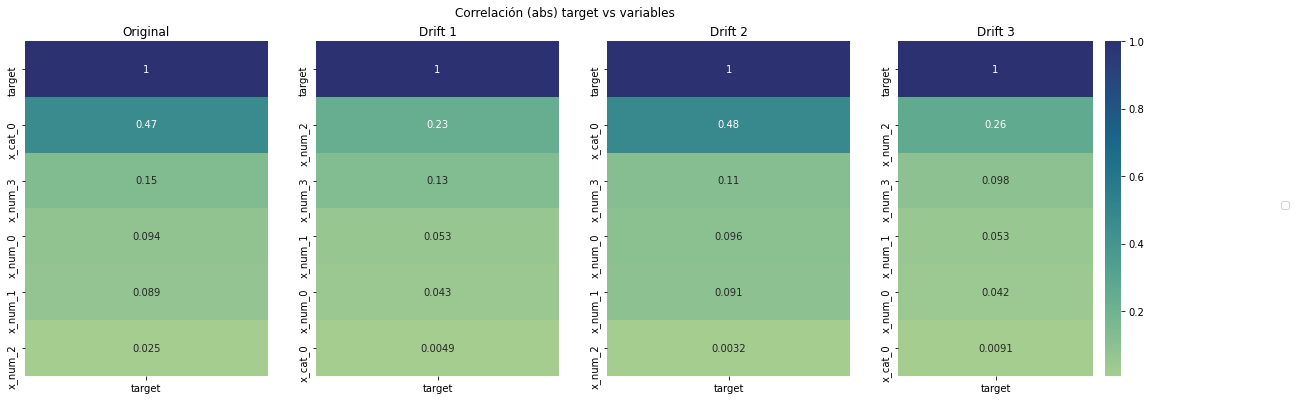

In [48]:
title = ["Original","Drift 1", "Drift 2", "Drift 3"]

fig, axes = plt.subplots(1, 4, figsize=(20, 6))
i=0
cbar=False
for df in [df_RT[:5000], df_RT[5000:10000], df_RT[10000:15000], df_RT[15000:]]:

    corr = df.corr()
    sns.heatmap(abs(corr[["target"]]).sort_values(by="target",ascending=False), cbar=cbar, annot=True, cmap="crest", ax=axes[i])
    axes[i].legend([],[], frameon=False)
    axes[i].title.set_text(f'{title[i]}')

    i+=1
    if i==3:
        cbar=True

line, label = axes[0].get_legend_handles_labels()
fig.legend(line, label, loc='lower center', bbox_to_anchor=(1, 0.5))
fig.subplots_adjust(top=0.9)
fig.suptitle(f'Correlación (abs) target vs variables')
plt.show()

### Conjunto de datos 15 - Drift gradual

In [11]:
# Generating dataset from mixed aux dataframes
df_RT = RT_1_2_g

# Display in screen and export to csv
print(df_RT.head(10))
df_RT.to_csv("./_15_data_RT_gradual.csv", index=False)

    x_num_0   x_num_1   x_num_2   x_num_3  x_cat_0  target
0  0.622902  0.741787  0.795194  0.942450        2       1
1  0.652032  0.530040  0.840348  0.775959        0       0
2  0.648975  0.900900  0.113206  0.469069        0       0
3  0.380758  0.101974  0.249331  0.731184        1       0
4  0.279482  0.916345  0.765725  0.159604        0       0
5  0.138767  0.617453  0.126699  0.001775        0       0
6  0.209456  0.215481  0.982421  0.872408        1       0
7  0.313651  0.198889  0.876119  0.625730        0       0
8  0.940976  0.690642  0.966564  0.893742        1       0
9  0.021570  0.414907  0.935793  0.263812        1       0


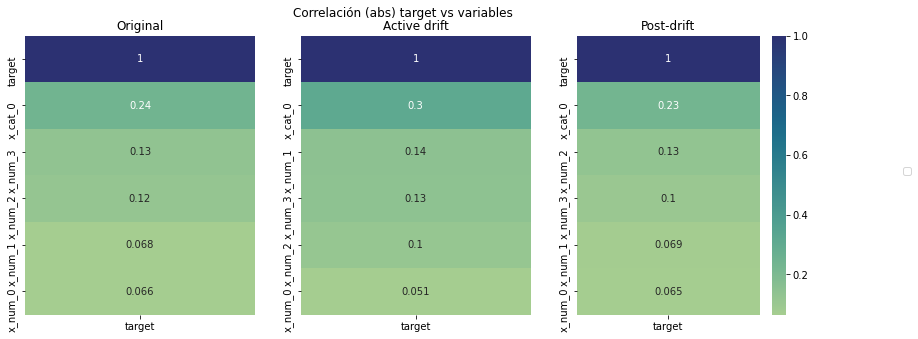

In [54]:
title = ["Original","Active drift", "Post-drift"]

fig, axes = plt.subplots(1, 3, figsize=(14, 5))
i=0
cbar=False
for df in [df_RT[:9750], df_RT[9750:10250], df_RT[10250:]]:

    corr = df.corr()
    sns.heatmap(abs(corr[["target"]]).sort_values(by="target",ascending=False), cbar=cbar, annot=True, cmap="crest", ax=axes[i])
    axes[i].legend([],[], frameon=False)
    axes[i].title.set_text(f'{title[i]}')

    i+=1
    if i==2:
        cbar=True

line, label = axes[0].get_legend_handles_labels()
fig.legend(line, label, loc='lower center', bbox_to_anchor=(1, 0.5))
fig.subplots_adjust(top=0.9)
fig.suptitle(f'Correlación (abs) target vs variables')
plt.show()